# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In exercise (9) we implemented a code based on a Genetic Algorithm to solve the Traveling Salesman Problem (detailed descripion can be found there). The goal of these excercises is to solve the TSP with other methods.

### Exercise 10.1
First, we want to solve the TSP with the Simulated Annealing algorithm. 


**Simulated Annealing (SA) algorithm**
    
Simulated Annealing is another technique used to solve optimization problems. It is based on a comparison with a thermodynamic process: the search for the global optimum is compared to a liquind that cools down and crystallize while temperature decreases to $0 \ K$ and energy reaches its minimum value. This is reasonable if we consider the cost function as the total energy of the system  $L(x)=E$

This notion of slow cooling implemented in the simulated annealing algorithm is interpreted as a slow decrease in the probability of accepting worse solutions as the solution space is explored, since the algorithm works as follows: the temperature progressively decreases from an initial positive value to zero; at each time/temperature step, the algorithm randomly selects a solution close to the current one, measures its quality, and moves to it according to the temperature-dependent probabilities of selecting better or worse solutions, which during the search respectively remain 1 and decrease towards zero.

More specifically, the search steps are the following:

**1.** the code first evaluates $L^{(1)}(\vec x)$, the cost function, which corresonds to the length of the path, for the initial configuration.

**2.** It proposes the next configuration $\vec x'$ applying mutations to the current one (the same used for exercise (10)).

**3.** It evaluates the quality of the proposed move, and so the probability to accept it, using its cost function $L^{(1)}(\vec x')$:

$$ p(x)=\begin{cases} e^{-\beta_i  \ (L(\vec x')-L(\vec x))} & \text{if $L(\vec x')>L(\vec x)$} \\ 1 & \text{otherwise} \end{cases}$$

which means:
- if $L(\vec x')<L(\vec x)$, $\vec x'$ is an better solution so the move is accepted with probability one;
- if $L(\vec x')>L(\vec x)$, the move is accepted with probability given by the Boltzmann distribution, sampled with the Metropolis algorithm.

$\qquad \beta_i=1/T_i$, where $T_i$ is the temperature at that point of the simulation (and so the starting temperature, as we are considering the first move).

Except for the first one, these steps are repeated at every time/temperature step $T_i$ (or $\beta _i$ ), with $i=1...N$, for $n_i$ times (different for each temperature step).

$T_i$ is reduced at every time step following the annealing shedule, a discrete and finite sequence of temperature values decreasing progressively: $\{(n_1,T_1), (n_2,T_2), \dots , (n_N, T_N)\}$.

Since the probability to accept a proposed move depends on the temperature, at high temperatures, and so at the beginning of the simulation, the acceptance rate of a proposed move is higher (if we consider the thermodynamic similitude, particles move freely and can assume several configurations), while it decreases going on with the simulation at lower temperatures (particles progressively lose mobility and assume configurations more and more similar to the state of minimum energy).

To implement the Simulated Annealing algorithm for solving the Travelling Salesman Problem, we use the GA code from exercise (9) and we adapt it to the Metropolis algorithm implementation of exercise (5), in order to have an annealing shedule for paths instead of a sequence of generations.

**Parameters choice**

As explained in the previous exercises, setting the right parameters for the simulation is of central importance for the algorithm performance. 

The behaviour of the acceptance rate of the proposed moves with temperature lead to suppose it is important to perform more steps for the Metropolis sampling at lower temperatures, as we want to explore the whole configuration space not to get stuck in a local minimum. Thus, a good choice is to start with a low value of Metropolis steps $n_1$ and to increment them of $100$ at every temperature step. If we let the user decide $n_N$, the moves corresponding to the last temperature step, then $n_1=n_N(n_N-100(N-1))^{-1}$.

Also the annealing shedule has to be well calibrated: as for real thermodynamic systems, it is important to perform a slow cooling, allowing redistribution of the particles as they lose mobility, so that the system preserves its ergodicity; otherwise, outside the similitude, the algorithm does not converge to the global optimum. A good choice is to decrease the temperature as follows: $ T_{i+1}= c T_{i}$, with decay rate $c <1$. In fact, this cooling sheme allows to better explore low temperatures and avoids that the temperature assumes values under $0 K$.

After some runs of the code, we decide to set the following parameters:

- initial temperature: $20$

- temperature decay rate: $0.9$

- number of time/temperature steps: $100$

- number of (target) Metropolis steps: $10000$

**Note**: for the way we chose to calculate $n_i$, input number of Metropolis steps must be at least $100$ times the number of temperature steps.


The results shown below are computed for:

**1.** 32 cities placed on a circumference; 
<br> **2.** 32 cities placed inside a square.

In order to show the behaviour of the optimization process, beyond the best path obtained, we picture the length of the best path $L^{(1)}$ as a function of the number of temperature steps.

#### 1. Cities on a circumference

In [1]:
import matplotlib.pyplot as plt
import numpy as np

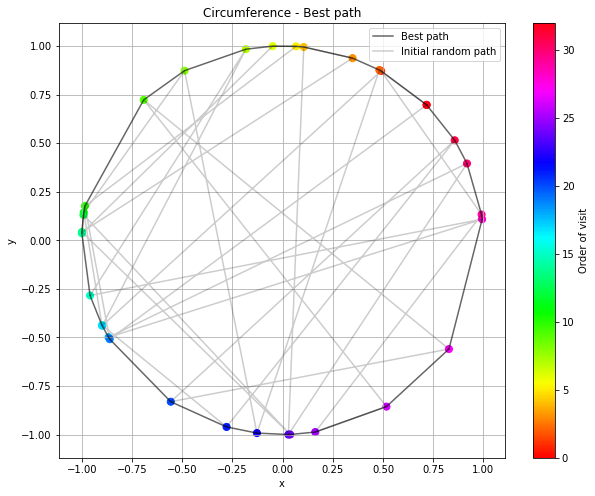

In [2]:
x, y = np.loadtxt("10.1/circle/best_path.out", usecols=(0,1), unpack=True)
xi, yi = np.loadtxt("10.1/circle/positions.out", usecols=(0,1), unpack=True)
ncities=len(x)

fig= plt.figure(figsize=(10,8))
plt.plot(x,y, color='black', alpha=0.6, label="Best path")
plt.plot(xi,yi, color='black', alpha=0.2, label="Initial random path")
plt.scatter(x,y, s=50, c=np.arange(ncities), cmap='hsv')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circumference - Best path')
plt.grid(True)
plt.legend()
plt.colorbar().set_label('Order of visit')

plt.show()

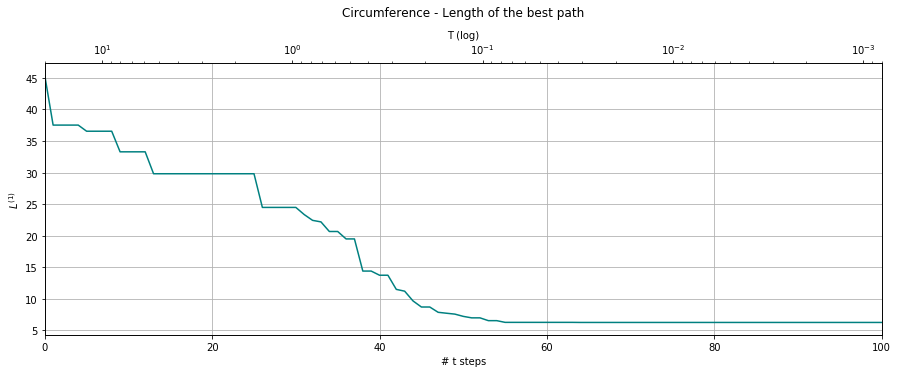

After 100 temperature steps, at T= 0.000590253 the length of the best path is: 6.2403


In [3]:
x, t, y = np.loadtxt("10.1/circle/best_length.out", usecols=(0,1,2), unpack=True)

fig= plt.figure(figsize=(15,5))

plt.title('Circumference - Length of the best path',y=1.15)

plt.plot(x,y, color='teal', label="$L^{(1)}$")
plt.xlabel('# t steps')
plt.ylabel('$L^{(1)}$')
plt.xlim(0,100)
plt.grid(True)

ax2 = plt.twiny() 
ax2.set_xlabel('T (log)')
ax2.plot(t, y, alpha=0)
ax2.set_xlim(20,0.0008)
ax2.set_xscale('log')

plt.show()

tstep, t, best = np.loadtxt("10.1/circle/best_length.out", usecols=(0,1,2), skiprows=100, unpack=True)
print("After", int(tstep), "temperature steps, at T=",t,"the length of the best path is:", best)

#### 1. Cities inside a square

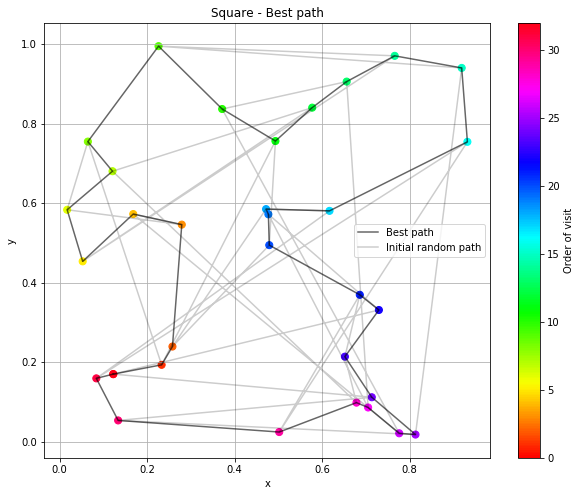

In [4]:
x, y = np.loadtxt("10.1/square/best_path.out", usecols=(0,1), unpack=True)
xi, yi = np.loadtxt("10.1/square/positions.out", usecols=(0,1), unpack=True)
ncities=len(x)

fig= plt.figure(figsize=(10,8))
plt.plot(x,y, color='black', alpha=0.6, label="Best path")
plt.plot(xi,yi, color='black', alpha=0.2, label="Initial random path")
plt.scatter(x,y, s=50, c=np.arange(ncities), cmap='hsv')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Square - Best path')
plt.grid(True)
plt.legend()
plt.colorbar().set_label('Order of visit')

plt.show()

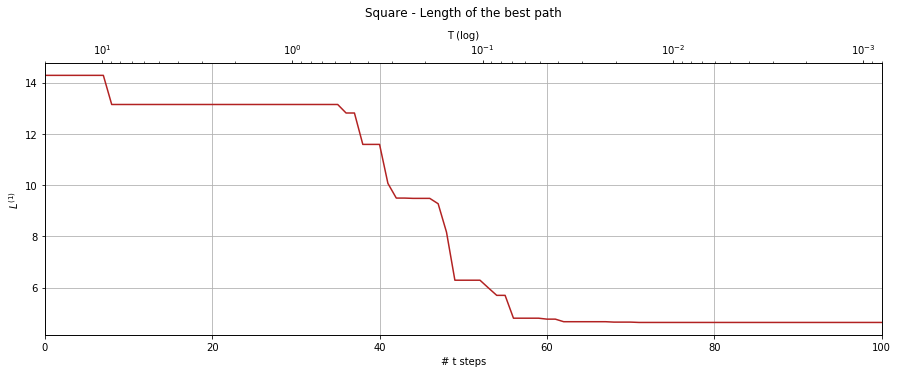

After 100 temperature steps, at T= 0.000590253 the length of the best path is: 4.63666


In [5]:
x, t, y = np.loadtxt("10.1/square/best_length.out", usecols=(0,1,2), unpack=True)

fig= plt.figure(figsize=(15,5))

plt.title('Square - Length of the best path',y=1.15)

plt.plot(x,y, color='firebrick', label="$L^{(1)}$")
plt.xlabel('# t steps')
plt.ylabel('$L^{(1)}$')
plt.xlim(0,100)
plt.grid(True)

ax2 = plt.twiny() 
ax2.set_xlabel('T (log)')
ax2.plot(t, y, alpha=0)
ax2.set_xlim(20,0.0008)
ax2.set_xscale('log')

plt.show()

tstep, t, best = np.loadtxt("10.1/square/best_length.out", usecols=(0,1,2), skiprows=100, unpack=True)
print("After", int(tstep), "temperature steps, at T=",t,"the length of the best path is:", best)

We can see from the pictures that the simulations make $L^{(1)}$ converge to a value that we reasonably assume is its minimum value, and so the solution of the Traveling Salesman Problem.

From the square configuration results, we notice that the length of the best path found is lower than the one obtained with our previous Genetic Algorithm:
- $L^{(1)}_{min \ GA}=4.67677$
- $L^{(1)}_{min \ SA}=4.63666$

This is probably due to the fact that can occur that the GA gets stuck in local minimum values of $L^{(1)}$, especially if the configuration is complex.

### Exercise 10.2

The purpose of this exercise is to solve the TSP problem with a parallelized GA code. 

**Parallel computing**
    
With Parallel computing we here refer to the Single Program Multiple Data (SPMD) paradigm, the process of simultaneous execution of the same code by multiple processors. The goal is to better explore the space of configurations and obtain better performances for the optimum search.

Communication between the nodes is performed thenks to the MPI library functions. We differentiate the tasks of each node using their rank value, which is important to coordinate the exchange of data between them.

We take the code used for exercise (9) and we implement it in order to make it perform $4$ parallel GA searches of the optimal path, one for each node. Every $N_{migr}$ generations the nodes exchange their best paths randomly.

We make every node start on the same initial cities configuration in order to make their behaviour comparable, but then we impose a different initialization of the random number generator for each so that they perform different optimum searches.

Except for this, for the parallel run initialization and for the migrations algorithm, the code is the same of exercise (9).

The results shown below are computed for:

**1.** 32 cities placed on a circumference; 
<br> **2.** 32 cities placed inside a square.

The parameters used for running the code are the same chosen in exercise (9) (in order to make results comparable):

- number of paths in each population: $5000$

- number of generations of populations: $300$

- crossover probability: $P_c=60\%$

- mutation probability: $P_m=5\%$

We picture results for $N_{migr}=50$ and $N_{migr}=20$.

In order to show the behaviour of the optimization process, beyond the best path obtained, we picture the length of the best path $L^{(1)}$ computed by each node (*rank 0*, *rank 1*, *rank 2*, *rank 3* ) as a function of the generations of the algorithm.

#### 1. Cities on a circumference

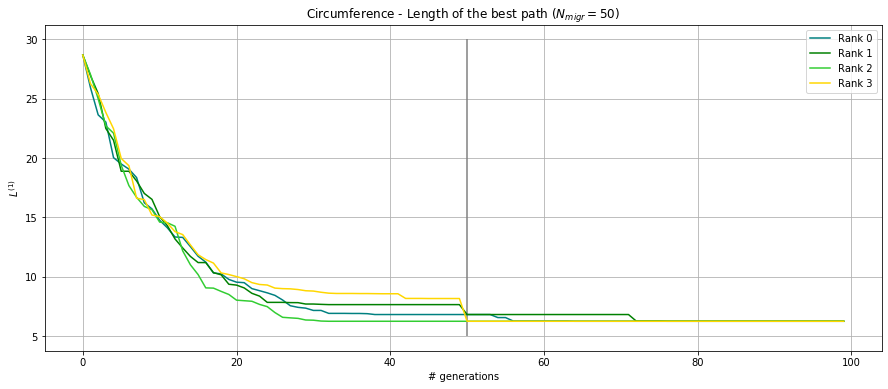

Rank 0 : after 300 generations, the length of the best path is: 6.2403
Rank 1 : after 300 generations, the length of the best path is: 6.2403
Rank 2 : after 300 generations, the length of the best path is: 6.2403
Rank 3 : after 300 generations, the length of the best path is: 6.2403


In [6]:
colors=['teal','green','limegreen','gold']
migr_50=[50,100,150]
migr_20=[20,40,60,80,100,120,140,160,180]

fig= plt.figure(figsize=(15,6))

for r in range (4):
    x, y, z = np.loadtxt("10.2/circle_50migr/"+str(r)+"_best_length.out", usecols=(0,1,2), max_rows=100, unpack=True)
    plt.plot(x,y, color=colors[r], label="Rank "+str(r))
    
plt.vlines(50,ymin=5,ymax=30, color='grey')
plt.xlabel('# generations')
plt.ylabel('$L^{(1)}$')
plt.title('Circumference - Length of the best path ($N_{migr}=50$)')
plt.grid(True)
plt.legend()
plt.show()

for r in range (4):
    gen, best = np.loadtxt("10.2/circle_50migr/"+str(r)+"_best_length.out", usecols=(0,1), skiprows=300, unpack=True)
    print("Rank",r,": after", int(gen), "generations, the length of the best path is:", best)

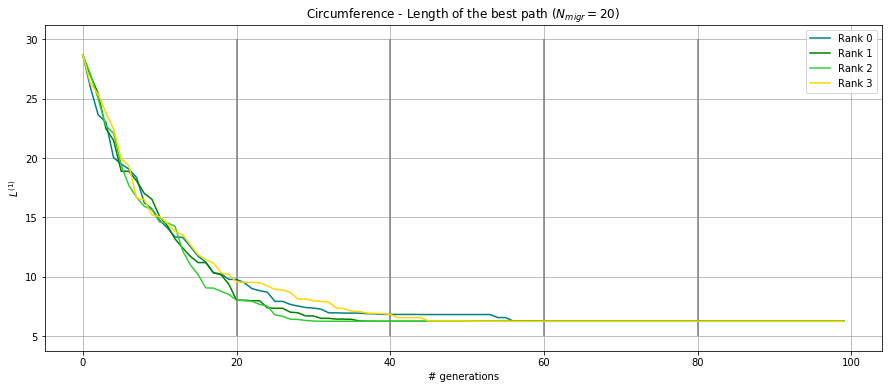

Rank 0 : after 300 generations, the length of the best path is: 6.2403
Rank 1 : after 300 generations, the length of the best path is: 6.2403
Rank 2 : after 300 generations, the length of the best path is: 6.2403
Rank 3 : after 300 generations, the length of the best path is: 6.2403


In [7]:
fig= plt.figure(figsize=(15,6))

for r in range (4):
    x, y, z = np.loadtxt("10.2/circle_20migr/"+str(r)+"_best_length.out", usecols=(0,1,2), max_rows=100, unpack=True)
    plt.plot(x,y, color=colors[r], label="Rank "+str(r))

for i in range (4):
    plt.vlines(migr_20[i],ymin=5,ymax=30, color='grey')
plt.xlabel('# generations')
plt.ylabel('$L^{(1)}$')
plt.title('Circumference - Length of the best path ($N_{migr}=20$)')
plt.grid(True)
plt.legend()
plt.show()

for r in range (4):
    gen, best = np.loadtxt("10.2/circle_20migr/"+str(r)+"_best_length.out", usecols=(0,1), skiprows=300, unpack=True)
    print("Rank",r,": after", int(gen), "generations, the length of the best path is:", best)

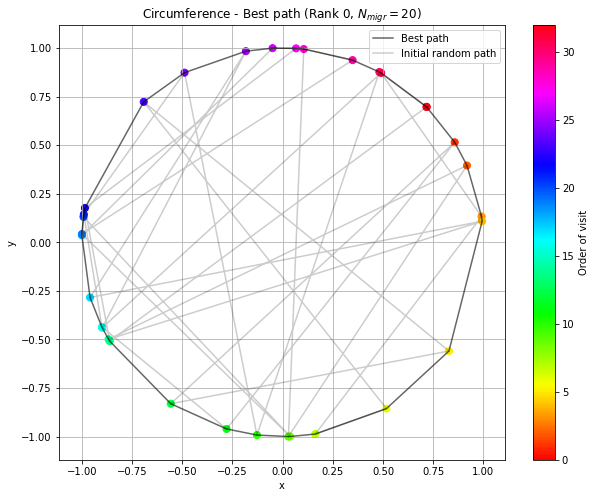

In [8]:
x, y = np.loadtxt("10.2/circle_20migr/0_best_path.out", usecols=(0,1), unpack=True)
xi, yi = np.loadtxt("10.2/circle_20migr/positions.out", usecols=(0,1), unpack=True)
ncities=len(x)

fig= plt.figure(figsize=(10,8))
plt.plot(x,y, color='black', alpha=0.6, label="Best path")
plt.plot(xi,yi, color='black', alpha=0.2, label="Initial random path")
plt.scatter(x,y, s=50, c=np.arange(ncities), cmap='hsv')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circumference - Best path (Rank 0, $N_{migr}=20$)')
plt.grid(True)
plt.legend()
plt.colorbar().set_label('Order of visit')

plt.show()

#### 1. Cities inside a square

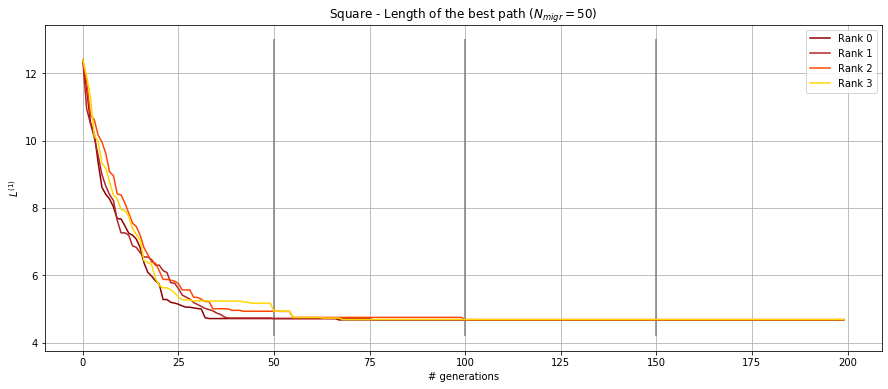

Rank 0 : after 300 generations, the length of the best path is: 4.67677
Rank 1 : after 300 generations, the length of the best path is: 4.67677
Rank 2 : after 300 generations, the length of the best path is: 4.67677
Rank 3 : after 300 generations, the length of the best path is: 4.67677


In [9]:
colors=['darkred','firebrick','orangered','gold']

fig= plt.figure(figsize=(15,6))

for r in range (4):
    x, y, z = np.loadtxt("10.2/square_50migr/"+str(r)+"_best_length.out", usecols=(0,1,2), max_rows=200, unpack=True)
    plt.plot(x,y, color=colors[r], label="Rank "+str(r))

for i in range (3):
    plt.vlines(migr_50[i],ymin=4.2,ymax=13, color='grey')
plt.xlabel('# generations')
plt.ylabel('$L^{(1)}$')
plt.title('Square - Length of the best path ($N_{migr}=50$)')
plt.grid(True)
plt.legend()
plt.show()

for r in range (4):
    gen, best = np.loadtxt("10.2/square_50migr/"+str(r)+"_best_length.out", usecols=(0,1), skiprows=300, unpack=True)
    print("Rank",r,": after", int(gen), "generations, the length of the best path is:", best)

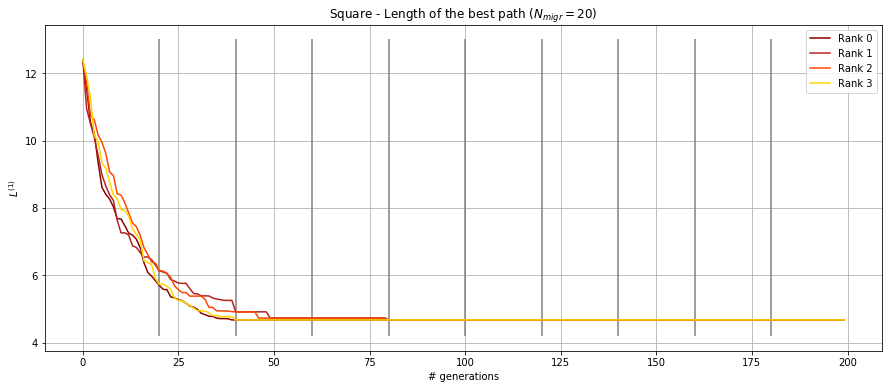

Rank 0 : after 300 generations, the length of the best path is: 4.67677
Rank 1 : after 300 generations, the length of the best path is: 4.67677
Rank 2 : after 300 generations, the length of the best path is: 4.67677
Rank 3 : after 300 generations, the length of the best path is: 4.67677


In [10]:
fig= plt.figure(figsize=(15,6))

for r in range (4):
    x, y, z = np.loadtxt("10.2/square_20migr/"+str(r)+"_best_length.out", usecols=(0,1,2), max_rows=200, unpack=True)
    plt.plot(x,y, color=colors[r], label="Rank "+str(r))

for i in range (9):
    plt.vlines(migr_20[i],ymin=4.2,ymax=13, color='grey')
plt.xlabel('# generations')
plt.ylabel('$L^{(1)}$')
plt.title('Square - Length of the best path ($N_{migr}=20$)')
plt.grid(True)
plt.legend()
plt.show()

for r in range (4):
    gen, best = np.loadtxt("10.2/square_20migr/"+str(r)+"_best_length.out", usecols=(0,1), skiprows=300, unpack=True)
    print("Rank",r,": after", int(gen), "generations, the length of the best path is:", best)

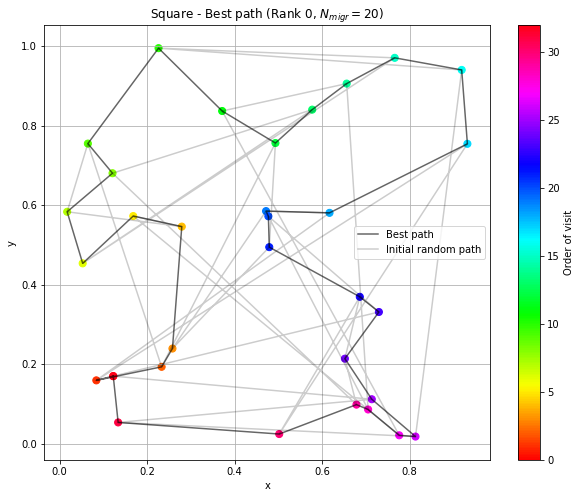

In [11]:
x, y = np.loadtxt("10.2/square_20migr/0_best_path.out", usecols=(0,1), unpack=True)
xi, yi = np.loadtxt("10.2/square_20migr/positions.out", usecols=(0,1), unpack=True)
ncities=len(x)

fig= plt.figure(figsize=(10,8))
plt.plot(x,y, color='black', alpha=0.6, label="Best path")
plt.plot(xi,yi, color='black', alpha=0.2, label="Initial random path")
plt.scatter(x,y, s=50, c=np.arange(ncities), cmap='hsv')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Square - Best path (Rank 0, $N_{migr}=20$)')
plt.grid(True)
plt.legend()
plt.colorbar().set_label('Order of visit')

plt.show()

As we can see from the pictures, introducing migrations (represented by the vertical lines in the graphs) makes the algorithm converge faster. In fact, if we compare the results for simulations with migrations every $N_{migr}=50$ generations and every $N_{migr}=20$, we can notice that with the latter we obtain the minimum value of $L^{(1)}$ before: just after $\sim 30$ generations for the circumference configuration and after $\sim 40$ for the square, while for the simulation with $N_{migr}=50$ are necessary respectively $\sim 35$ and $\sim 70$ generations for $L^{(1)}$ to converge. Note that also the generations required for all nodes to find the optimum are less for $N_{migr}=20$.

Compared to the non-parallel GA algorithm, the one with $N_{migr}=20$ is faster, while the one with $N_{migr}=50$ leads to similar performances and so does not really improve the GA search.

In these exercises is also more evident the difference between the results for the two configurations, that has not to do with the algorithms for TSP solving: the last converge slower because the cities configuration on the plane is more disordered if compared to cities placed on a circumference and this makes the search for the best path harder.

**Note**: Pictures display $L^{(1)}$ as a function of the first $100$ generation for the circumference configuration and $200$ for the square, just to better show the difference between the nodes behaviour during the optimum search and the migrations. As previously said, simulations are run for $300$ generations to be sure they actually converge. 

**Note**: Only the best paths obtained with the first node are shown, for representative intent, as all the nodes obtain the same results at the end of the simulations.